In [24]:
import numpy as np
import pandas as pd

In [25]:
albums = pd.read_csv('data/spotify-2023.csv', encoding = "ISO-8859-1")
streams = albums['streams']
artist = albums['artist(s)_name']
danceability = albums['danceability_%']
month = albums['released_month']
albums

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [26]:
albums = albums.to_numpy()
albums

# not sure how to get around this,
# when i convert the dataframe to numpy, 
# i can't retain the column indices.

array([['Seven (feat. Latto) (Explicit Ver.)', 'Latto, Jung Kook', 2,
        ..., 0, 8, 4],
       ['LALA', 'Myke Towers', 1, ..., 0, 10, 4],
       ['vampire', 'Olivia Rodrigo', 1, ..., 0, 31, 6],
       ...,
       ['A Veces (feat. Feid)', 'Feid, Paulo Londra', 2, ..., 0, 8, 6],
       ['En La De Ella', 'Feid, Sech, Jhayco', 3, ..., 0, 12, 5],
       ['Alone', 'Burna Boy', 1, ..., 0, 11, 5]], dtype=object)

In [27]:
albums[albums[:,7]==0] = np.nan

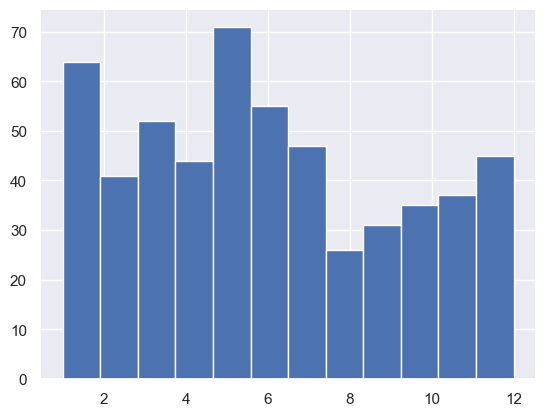

In [28]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(albums[:,4], 12); # plotting top 50 music releases on a 12 month chart

# lets say i want to release a new song
# do i want to release when activity is low or high?
# lets sample the highest and lowest activity month to see how those artists did


In [29]:
albums = np.array(albums)
albums[albums[:,7]==0] = np.nan

In [30]:
august_releases = albums[month == 8]
january_releases = albums[month == 1]
all_releases = albums[month >= 0]
january_charts = january_releases[:,7]
august_charts = august_releases[:,7]
all_charts = all_releases[:,7]

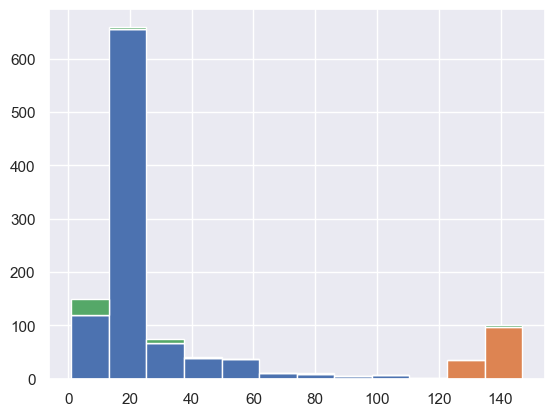

In [31]:
plt.hist([all_charts, january_charts, august_charts], 12, histtype='bar', stacked=True); #in green

# below: x axis is place on the spotify chart (lower is obvs better)
# below: y axis is number of songs

# trying not to get too in the weeds on matplotlib since that's for later!


(array([38.,  3.,  2.,  5.,  4.,  0.,  4.,  2.,  3.,  3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

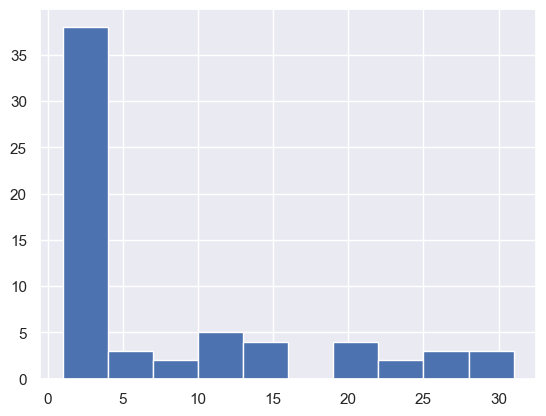

In [32]:
# so january has the highest activity for popular releases,
# and january releases perform better on the charts than august, too

plt.hist(january_releases[:,5])

In [37]:
# wow, so a lot of Jan1 releases...

# let's see what was released on Jan1

jan1 = january_releases[january_releases[:,5]==1]
pd.DataFrame(jan1).head()

#pd.DataFrame(data=jan1, index=jan1[:,0], columns=jan1[0,:])

# not sure why but pandas removed all my column and row info :(

array([['I Wanna Be Yours', 'Arctic Monkeys', 1, 2013, 1, 1, 12859, 110,
        '1297026226', 24, 98, '582', 2, '73', 135, nan, 'Minor', 48, 44,
        42, 12, 2, 11, 3],
       ['Blank Space', 'Taylor Swift', 1, 2014, 1, 1, 11434, 53,
        '1355959075', 154, 123, '410', 2, '81', 96, 'F', 'Major', 75, 57,
        68, 9, 0, 13, 6],
       ['Style', 'Taylor Swift', 1, 2014, 1, 1, 7830, 42, '786181836',
        94, 111, '151', 4, '82', 95, 'D', 'Major', 60, 48, 79, 0, 0, 12,
        4],
       ['Yellow', 'Chris Molitor', 1, 1999, 1, 1, 31358, 43,
        '1755214421', 196, 2, '4,053', 5, '0', 173, 'B', 'Major', 43, 28,
        66, 0, 0, 23, 3],
       ['Viva La Vida', 'Coldplay', 1, 2008, 1, 1, 33898, 62,
        '1592909789', 233, 0, '4,095', 9, '0', 138, 'F', 'Minor', 49, 42,
        62, 9, 0, 11, 3],
       ['Riptide', 'Vance Joy', 1, 1975, 1, 1, 31123, 55, '2009094673',
        300, 65, '1,003', 1, '0', 102, 'C#', 'Major', 48, 50, 73, 43, 0,
        15, 4],
       ['Summertime Sa

In [34]:
albums = np.array(albums)
streams = np.array(streams)

In [35]:
print(albums.shape)

np.sort(albums[:,8])

# this isn't sorting correctly! not sure why, but i suspect the numbers
# are too big for the data type that's being used. what do you think jon?

(953, 24)


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
#albums.describe()

In [ ]:
# show me the artists who have danceability of 80 or more

np.sum(danceability > 80) #number of artists
dance80 = albums[danceability>80] #full chart, only danceability>80
dance80

array([['Sprinter', 'Dave, Central Cee', 2, ..., 0, 8, 24],
       ['fukumean', 'Gunna', 1, ..., 0, 28, 9],
       ['La Bebe - Remix', 'Peso Pluma, Yng Lvcas', 2, ..., 0, 8, 33],
       ...,
       ['Privileged Rappers', 'Drake, 21 Savage', 2, ..., 0, 12, 20],
       ['BackOutsideBoyz', 'Drake', 1, ..., 0, 39, 32],
       ['En La De Ella', 'Feid, Sech, Jhayco', 3, ..., 0, 12, 5]],
      dtype=object)

In [ ]:
stream_filter = albums[albums[:, 8].argsort(kind='mergesort')]
stream_filter

array([['Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol', 'Arcangel, Bizarrap',
        2, ..., 0, 15, 30],
       ['ýýýabcdefu', 'Gayle', 1, ..., 0, 37, 5],
       ['Best Friends', 'The Weeknd', 1, ..., 0, 35, 21],
       ...,
       ['Arcade', 'Duncan Laurence', 1, ..., 0, 14, 4],
       ['Anti-Hero', 'Taylor Swift', 1, ..., 0, 19, 5],
       ['Love Grows (Where My Rosemary Goes)', 'Edison Lighthouse', 1,
        ..., 0, 17, 3]], dtype=object)

In [ ]:
pd.DataFrame(stream_filter)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,"Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol","Arcangel, Bizarrap",2,2023,3,22,654,3,100409613,11,...,124,B,Minor,72,79,78,55,0,15,30
1,ýýýabcdefu,Gayle,1,2021,8,13,7215,0,1007612429,170,...,122,E,Major,70,42,54,30,0,37,5
2,Best Friends,The Weeknd,1,2022,1,7,1292,0,101114984,3,...,87,E,Minor,49,49,59,44,0,35,21
3,Right On,Lil Baby,1,2022,4,8,1116,0,101780047,31,...,166,D,Major,70,22,61,2,0,10,34
4,Revenge,XXXTENTACION,1,2017,8,25,3600,11,1022258230,7,...,140,B,Minor,75,18,25,78,0,11,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,...,152,C#,Major,65,35,65,44,18,21,7
949,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,...,170,G#,Major,44,27,32,89,0,14,5
950,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,72,A,Minor,45,27,33,82,0,14,4
951,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,97,E,Major,64,51,63,12,0,19,5


In [ ]:
stream_filter[0]

array(['Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol', 'Arcangel, Bizarrap', 2,
       2023, 3, 22, 654, 3, '100409613', 11, 3, '18', 1, '1', 124, 'B',
       'Minor', 72, 79, 78, 55, 0, 15, 30], dtype=object)